EDA

Now that our data is clean we will start to explore it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


df = pd.read_csv('total_houses.csv')
df.head()

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
0,5650000.0,314.0,286.0,4.0,5.0,2.0,JURIQUILLA
1,1595000.0,69.0,0.0,3.0,1.0,1.0,CIUDAD DEL SOL
2,11190000.0,370.0,0.0,4.0,4.0,3.0,ALTOZANO
3,790000.0,195.0,150.0,3.0,3.0,2.0,LA JOYA
4,849000.0,400.0,400.0,5.0,4.0,4.0,JURIQUILLA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           864 non-null    float64
 1   Total_Area_m^2  864 non-null    float64
 2   Built_Area_m^2  864 non-null    float64
 3   Bedrooms        864 non-null    float64
 4   Bathrooms       864 non-null    float64
 5   Parking         864 non-null    float64
 6   Neighborhood    864 non-null    object 
dtypes: float64(6), object(1)
memory usage: 47.4+ KB


In [4]:
# sorting values in ascending order by column Price
# Esto modifica el DataFrame 'df' directamente
df = df.sort_values(by='Price', ascending=True)
df.head(20)

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
631,72680.0,195.0,158.0,3.0,2.0,2.0,JURICA
300,350000.0,222.0,162.0,3.0,3.0,3.0,CENTRO
249,350000.0,157.0,152.0,2.0,2.0,2.0,HIDALGO
287,351000.0,80.0,65.0,1.0,1.0,1.0,PASEOS DEL PEDREGAL
220,351000.0,280.0,123.0,5.0,3.0,1.0,VILLAS DEL MESON
251,351000.0,120.0,90.0,3.0,2.0,1.0,JURICA
519,351000.0,203.0,88.0,3.0,3.0,1.0,MISION DE CONCA
222,357000.0,100.0,100.0,3.0,1.0,1.0,JURICA
206,367500.0,80.0,50.0,2.0,1.0,1.0,ANGELES
524,376528.0,120.0,80.0,2.0,2.0,1.0,CERRITO COLORADO


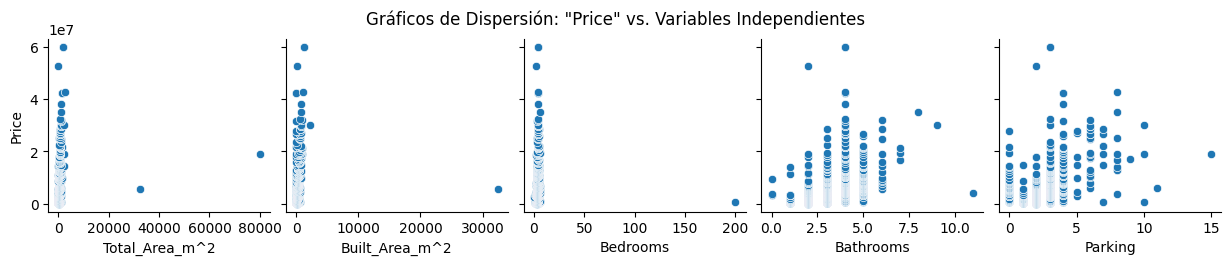

In [5]:

# 3. Usar pairplot para graficar solo la primera fila
sns.pairplot(
    data=df,
    y_vars=['Price'],          # Lista con UNA SOLA variable (la dependiente)
    x_vars=['Total_Area_m^2',	'Built_Area_m^2',	'Bedrooms',	'Bathrooms',	'Parking']	,        # Lista con MÚLTIPLES variables (las independientes)
    kind='scatter'
)

plt.suptitle(f'Gráficos de Dispersión: "Price" vs. Variables Independientes', y=1.02)
plt.show()

In [6]:
df.sort_values(by='Total_Area_m^2', ascending=True).tail()


,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
823,18950000.0,2200.0,750.0,4.0,4.0,10.0,JURIQUILLA
862,30000000.0,2500.0,2300.0,4.0,9.0,10.0,JURIQUILLA
863,42800000.0,2542.0,1200.0,4.0,4.0,8.0,VILLAS DEL MESON
861,5700000.0,32437.0,32437.0,3.0,3.0,4.0,FRAY JUNIPERO SERRA
830,19000000.0,80000.0,1.0,3.0,2.0,15.0,CENTRO


delete values upper 30000

In [7]:
df = df[df['Total_Area_m^2']<30000]

In [8]:
df.sort_values(by='Built_Area_m^2', ascending=True).tail()

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
854,21500000.0,1250.0,948.36,4.0,5.0,4.0,JURIQUILLA
863,42800000.0,2542.0,1200.00,4.0,4.0,8.0,VILLAS DEL MESON
859,59900000.0,1870.0,1281.00,4.0,4.0,3.0,MILENIO III
860,59900000.0,1870.0,1281.00,4.0,4.0,3.0,MILENIO III
862,30000000.0,2500.0,2300.00,4.0,9.0,10.0,JURIQUILLA


Not requiered delete more values

In [9]:
df.sort_values(by='Bedrooms', ascending=True).tail()

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
223,6800000.0,724.0,516.0,6.0,5.0,3.0,CENTRO
491,977400.0,430.0,430.0,6.0,5.0,4.0,VILLAS DEL MESON
835,35000000.0,1113.0,790.0,6.0,8.0,8.0,JURIQUILLA
686,5300000.0,398.0,350.0,6.0,5.0,4.0,ARBOLEDAS
179,750000.0,200.0,200.0,200.0,3.0,4.0,COLINAS DEL CIMATARIO


delete this house with more than 200 hundred houses

In [10]:
df = df[df['Bedrooms']<200]

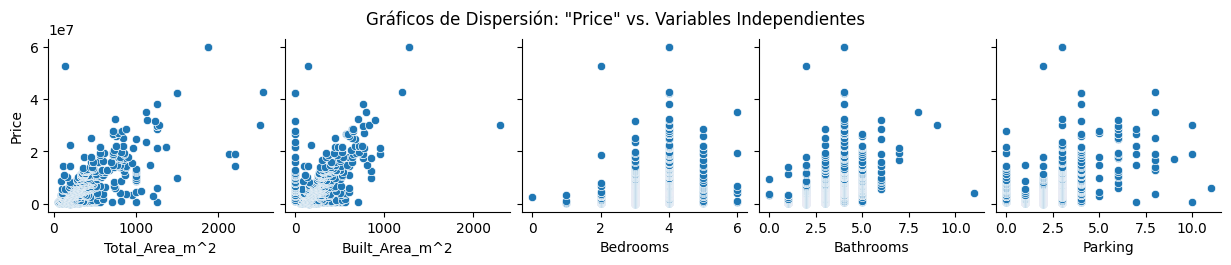

In [11]:

# 3. Usar pairplot para graficar solo la primera fila
sns.pairplot(
    data=df,
    y_vars=['Price'],          # Lista con UNA SOLA variable (la dependiente)
    x_vars=['Total_Area_m^2',	'Built_Area_m^2',	'Bedrooms',	'Bathrooms',	'Parking']	,        # Lista con MÚLTIPLES variables (las independientes)
    kind='scatter'
)

plt.suptitle(f'Gráficos de Dispersión: "Price" vs. Variables Independientes', y=1.02)
plt.show()

In [12]:
# function to plod Histogram and Boxplot
def hist_boxplot(df,column):
    # Gettin central tendency measures
    #column = 'Price'  # cambia por la columna que te interese
    
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode()
    std = df[column].std()

    # Crear figura con dos gráficos (histograma y boxplot)
    plt.figure(figsize=(12, 6))

    # ---------- HISTOGRAMA ----------
    plt.subplot(2, 1, 1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Agregamos las líneas de tendencia central
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode:.2f}')

    
    # Grid (rejilla)
    plt.grid(True, linestyle=':', alpha=0.7)

    # Detalles del gráfico
    plt.title(f'{column} histogram')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Media')
    plt.axvline(median, color='green', linestyle='--', linewidth=2, label='Mediana')
    plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label='Moda')
    plt.xlabel(column)

    # Grid (rejilla)
    plt.grid(True, linestyle=':', alpha=0.7)

    plt.title(f'Boxplot de {column}')
    plt.legend()

    print((std/mean)*100)

    plt.tight_layout()
    plt.show()

110.52563059360898


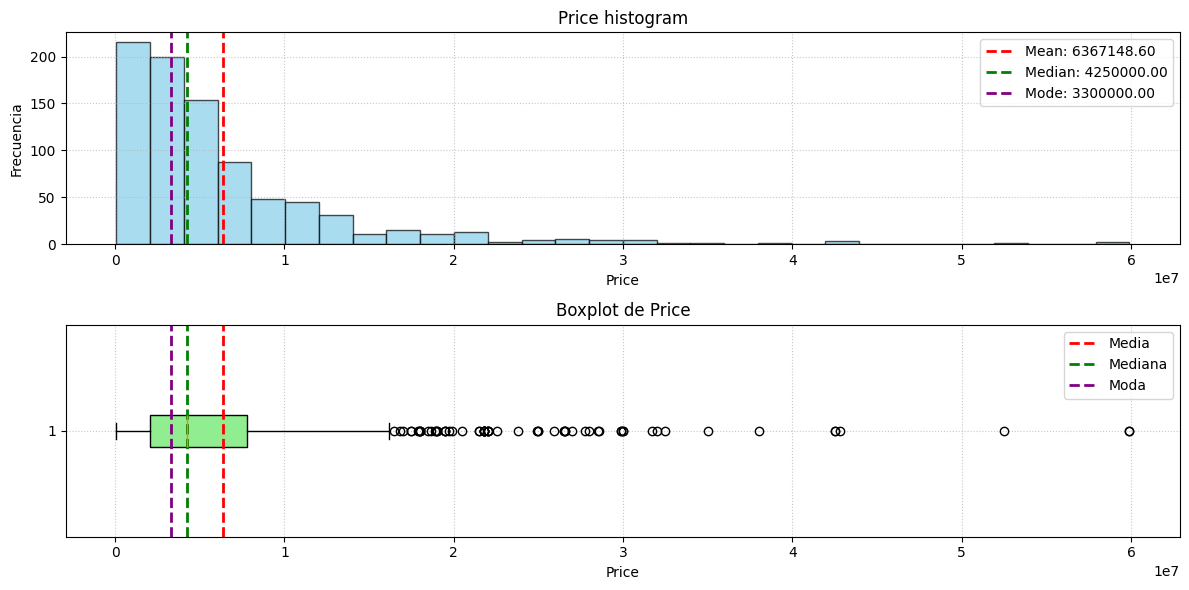

In [13]:
hist_boxplot(df,'Price')

* We can see a skewd distibution to the left
* There are outliers, houses with a cost of more than 15 millions, 
* Mean is $6,374,496, but this is very sensitive to outliers
* Median is $4,269,800
* Mode $3,300,00

So we can see that between Median and Mode we have one million of difference, we will delete outliers to get an normal distribution

In [14]:
df = df[df['Price']<16000000]

75.30419432962762


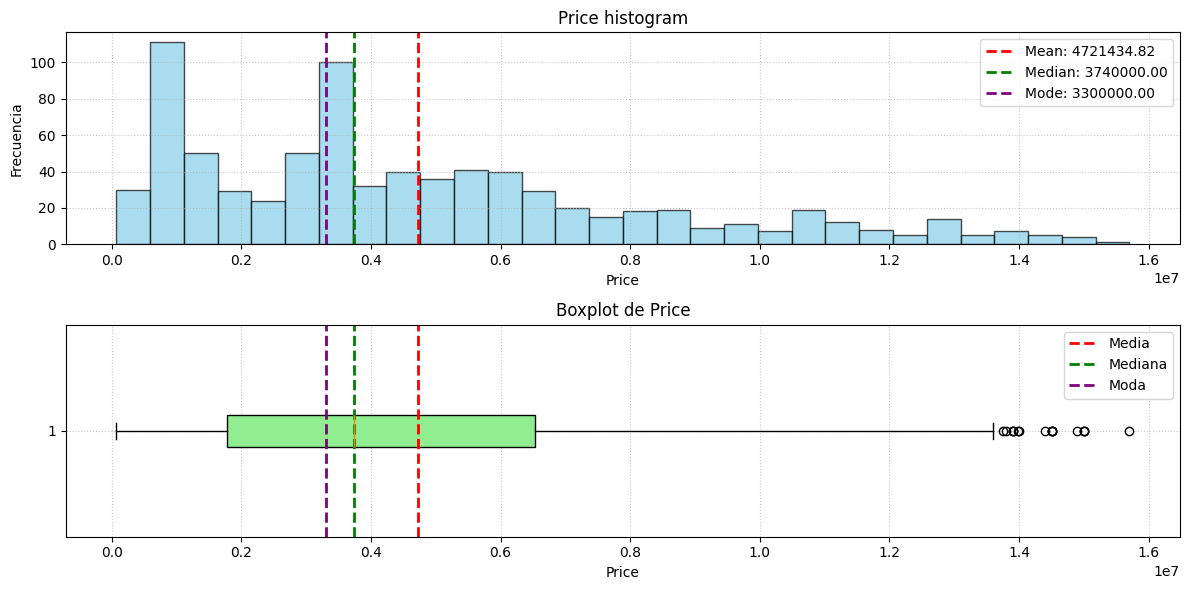

In [15]:
hist_boxplot(df,'Price')

In [16]:

df = df[df['Price']<13000000]

72.26410666198007


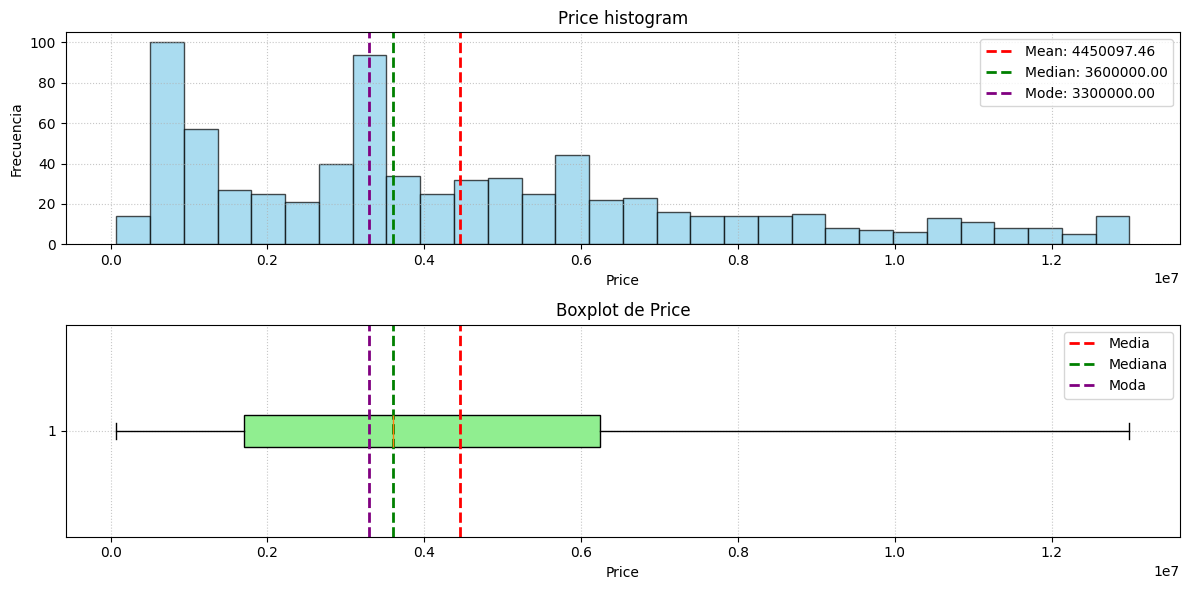

In [17]:
hist_boxplot(df,'Price')

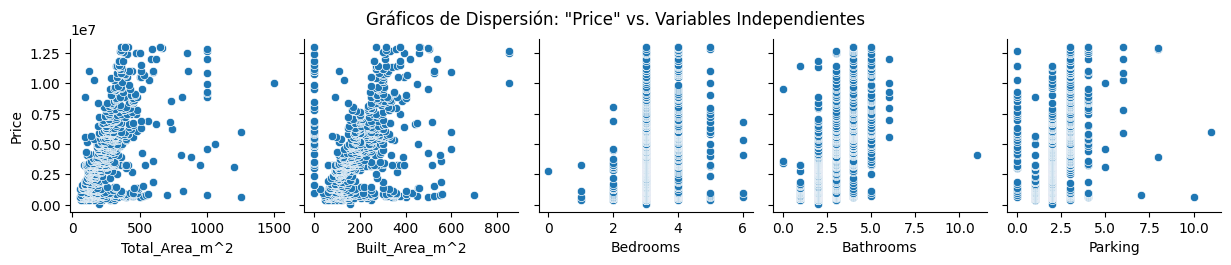

In [18]:

# 3. Usar pairplot para graficar solo la primera fila
sns.pairplot(
    data=df,
    y_vars=['Price'],          # Lista con UNA SOLA variable (la dependiente)
    x_vars=['Total_Area_m^2',	'Built_Area_m^2',	'Bedrooms',	'Bathrooms',	'Parking']	,        # Lista con MÚLTIPLES variables (las independientes)
    kind='scatter'
)

plt.suptitle(f'Gráficos de Dispersión: "Price" vs. Variables Independientes', y=1.02)
plt.show()

In [19]:
df[df['Built_Area_m^2']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
319,975000.0,126.0,0.0,3.0,2.0,2.0,OBRERA
309,980000.0,354.0,0.0,4.0,3.0,0.0,REAL DE JURIQUILLA
1,1595000.0,69.0,0.0,3.0,1.0,1.0,CIUDAD DEL SOL
483,1600000.0,146.0,0.0,3.0,1.0,2.0,SONTERRA
202,2340000.0,126.0,0.0,3.0,2.0,2.0,JURIQUILLA
356,3050000.0,133.0,0.0,3.0,2.0,2.0,JURIQUILLA
330,3300000.0,146.0,0.0,3.0,2.0,2.0,CUMBRES DEL LAGO
725,3440000.0,217.0,0.0,3.0,4.0,2.0,EL REFUGIO
292,3500000.0,190.0,0.0,3.0,2.0,3.0,EL REFUGIO
370,3550000.0,191.0,0.0,3.0,2.0,2.0,JURIQUILLA


In [20]:
df[df['Bedrooms']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
290,2750000.0,291.18,91.69,0.0,1.0,2.0,JURIQUILLA


In [21]:
df[df['Bathrooms']==0]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
548,3450000.0,153.0,153.0,3.0,0.0,2.0,EL CAMPANARIO
470,3600000.0,151.0,140.0,3.0,0.0,2.0,REAL DE JURIQUILLA
667,9500000.0,280.0,0.0,3.0,0.0,4.0,EL REFUGIO


In [22]:
df.shape

(769, 7)

In [23]:
# 1. Calcular los cuartiles

Q1 = df['Price'].quantile(0.25)

Q3 = df['Price'].quantile(0.75)# 2. Calcular el Rango Intercuartílico (IQR)

IQR = Q3 - Q1



print(f"Q1 (Primer Cuartil): {Q1:.2f}")

print(f"Q3 (Tercer Cuartil): {Q3:.2f}")

print(f"Rango Intercuartílico (IQR): {IQR:.2f}")



# 3. Calcular los límites teóricos de los bigotes

limite_inferior = Q1 - (1.5 * IQR)

limite_superior = Q3 + (1.5 * IQR)#     

print(limite_superior)
print(df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))))

Q1 (Primer Cuartil): 1700000.00
Q3 (Tercer Cuartil): 6245000.00
Rango Intercuartílico (IQR): 4545000.00
13062500.0
13062500.0


In [24]:
# deleting houses with a higher price than 15,000,000

max_whisker = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))
print(max_whisker)
df = df[df['Price']<max_whisker]

13062500.0


In [25]:
df['Price'].value_counts()

Price
3300000.0     47
849000.0      13
4750000.0      8
3400000.0      7
3500000.0      7
              ..
1960000.0      1
1946320.0      1
1930000.0      1
1869000.0      1
12990000.0     1
Name: count, Length: 425, dtype: int64

In [26]:
df['Price'].min()

72680.0

In [27]:
df[df['Price']<1000000]

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
631,72680.0,195.0,158.0,3.0,2.0,2.0,JURICA
300,350000.0,222.0,162.0,3.0,3.0,3.0,CENTRO
249,350000.0,157.0,152.0,2.0,2.0,2.0,HIDALGO
287,351000.0,80.0,65.0,1.0,1.0,1.0,PASEOS DEL PEDREGAL
220,351000.0,280.0,123.0,5.0,3.0,1.0,VILLAS DEL MESON
...,...,...,...,...,...,...,...
773,987000.0,183.0,140.0,3.0,3.0,2.0,MILENIO III
789,990000.0,275.0,150.0,4.0,3.0,3.0,SAN MIGUEL
303,990000.0,108.0,37.0,2.0,1.0,1.0,REAL DE JURIQUILLA
344,990000.0,105.0,95.0,3.0,1.0,2.0,EL MARQUES
